In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [7]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
X_train.shape

(11610, 8)

![](Seq_api.png "Title")

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 985us/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 0s 869us/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 0s 887us/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 0s 876us/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 0s 871us/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 0s 893us/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 0s 871us/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 0s 879us

In [20]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 613us/step - loss: 0.3596 - mae: 0.4269


In [21]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426402568817,
  0.38980168104171753,
  0.3872992694377899,
  0.38511765003204346,
  0.38287150859832764,
  0.3807542622089386,
  0.3787875175476074,
  0.37684163451194763,
  0.3748517632484436,
  0.37324920296669006,
  0.3715410530567169,
  0.3699612319469452,
  0.368447870016098,
  0.3671063780784607,
  0.36586254835128784,
  0.36476606130599976,
  0.36347639560699463,
  0.36216965317726135,
  0.36128607392311096],
 'mae': [0.448872447013855,
  0.44692230224609375,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.44146016240119934,
  0.4398253858089447,
  0.4384708106517792,
  0.4375317096710205,
  0.43594637513160706,
  0.4347257614135742,
  0.4335672855377197,
  0.432650089263916,
  0.4315134584903717,
  0.4306658208370209,
  0.4304641783237457,
  0.4293918311595917,
  0.42838096618652344,
  0.42722728848457336,
  0.42688849568367004],
 'val_loss': [0.3695237338542938,
  0.36980190873146057,
  0.3646637499332428,
  0.3632129

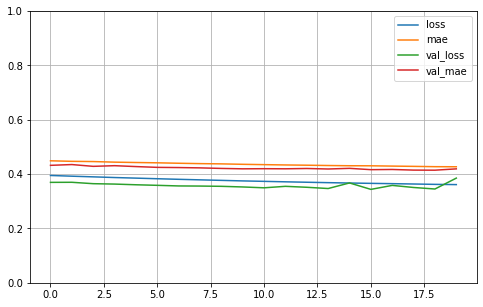

In [22]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [23]:
X_new = X_test[:3]

In [24]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

1/1 [==============================] - 0s 71ms/step
[[0.60721976]
 [1.8602647 ]
 [3.792632  ]]
[0.477   0.458   5.00001]


In [25]:
del model

In [26]:
keras.backend.clear_session()

In [27]:
del model

NameError: name 'model' is not defined

In [28]:
keras.backend.clear_session()

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [28]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [29]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [30]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [35]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Epoch 1/80
363/363 [==============================] - 1s 1ms/step - loss: 0.3456 - mae: 0.4151 - val_loss: 0.3376 - val_mae: 0.4073
Epoch 2/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3454 - mae: 0.4144 - val_loss: 0.3825 - val_mae: 0.4141
Epoch 3/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3448 - mae: 0.4150 - val_loss: 0.3491 - val_mae: 0.4085
Epoch 4/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3439 - mae: 0.4140 - val_loss: 0.3415 - val_mae: 0.4101
Epoch 5/80
363/363 [==============================] - 1s 3ms/step - loss: 0.3440 - mae: 0.4138 - val_loss: 0.3408 - val_mae: 0.4085
Epoch 6/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3432 - mae: 0.4138 - val_loss: 0.3480 - val_mae: 0.4078
Epoch 7/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3432 - mae: 0.4132 - val_loss: 0.3342 - val_mae: 0.4074
Epoch 8/80
363/363 [==============================] - 0s 1ms/step - loss: 0.

363/363 [==============================] - 1s 2ms/step - loss: 0.3250 - mae: 0.4011 - val_loss: 0.3270 - val_mae: 0.3948
Epoch 63/80
363/363 [==============================] - 1s 2ms/step - loss: 0.3242 - mae: 0.3999 - val_loss: 0.3133 - val_mae: 0.3959
Epoch 64/80
363/363 [==============================] - 2s 5ms/step - loss: 0.3244 - mae: 0.4003 - val_loss: 0.3141 - val_mae: 0.3939
Epoch 65/80
363/363 [==============================] - 2s 5ms/step - loss: 0.3244 - mae: 0.4003 - val_loss: 0.3147 - val_mae: 0.3936
Epoch 66/80
363/363 [==============================] - 1s 4ms/step - loss: 0.3238 - mae: 0.3998 - val_loss: 0.3106 - val_mae: 0.3927
Epoch 67/80
363/363 [==============================] - 1s 1ms/step - loss: 0.3236 - mae: 0.3998 - val_loss: 0.3255 - val_mae: 0.3954
Epoch 68/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3235 - mae: 0.3995 - val_loss: 0.3109 - val_mae: 0.3922
Epoch 69/80
363/363 [==============================] - 0s 1ms/step - loss: 0.3232

In [36]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 2ms/step - loss: 0.3246 - mae: 0.3981


In [37]:
model_history.history

{'loss': [0.3455650210380554,
  0.3453727066516876,
  0.34484273195266724,
  0.34393706917762756,
  0.34404730796813965,
  0.3431888222694397,
  0.3431897461414337,
  0.34253689646720886,
  0.3419821858406067,
  0.34164297580718994,
  0.3413829505443573,
  0.3410247564315796,
  0.34061795473098755,
  0.3400120735168457,
  0.33979862928390503,
  0.3392840027809143,
  0.3388920724391937,
  0.33904674649238586,
  0.33838045597076416,
  0.33783167600631714,
  0.33752086758613586,
  0.3369758129119873,
  0.3368613123893738,
  0.33630454540252686,
  0.335951030254364,
  0.33570003509521484,
  0.33563587069511414,
  0.33502811193466187,
  0.3347855508327484,
  0.3341604173183441,
  0.33355656266212463,
  0.3335135579109192,
  0.3333044946193695,
  0.3327399492263794,
  0.3326999843120575,
  0.3319782614707947,
  0.3320977985858917,
  0.33151695132255554,
  0.33094415068626404,
  0.3305876553058624,
  0.33094361424446106,
  0.3309093713760376,
  0.3300573527812958,
  0.3293668031692505,
  0.32

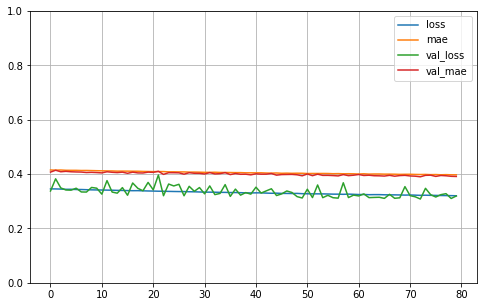

In [38]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

'C:\\Users\\pukhr'

C:\Users\pukhr


# Saving and Restoring

In [39]:
model.save("my_Func_model.h5")

In [40]:
%pwd

'C:\\Users\\hp\\Deep Learning Internshala Training\\Artificial Neural Network'

In [41]:
%cd C:\\Users\\hp\\Deep Learning Internshala Training\\Artificial Neural Network

C:\Users\hp\Deep Learning Internshala Training\Artificial Neural Network


In [47]:
del model

In [43]:
keras.backend.clear_session()

In [44]:
model = keras.models.load_model("my_Func_model.h5")

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [46]:
y_pred = model.predict(X_new)
print (y_pred)

1/1 [==============================] - 0s 58ms/step
[[0.6239849]
 [1.6036305]
 [4.4539957]]


# Using Callbacks during Training

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [51]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [52]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_loss: 0.4379

In [53]:
del model
keras.backend.clear_session()

In [54]:
model = keras.models.load_model("Model-10.h5")

In [55]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)

1/1 [==============================] - 0s 96ms/step - loss: 0.4382


In [56]:
print (mse_test)

0.4382285475730896


In [15]:
model.metrics_names

['loss']

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_diff=y_pred-y_test

In [26]:
y_pred.shape

(5160, 1)

In [ ]:
mse = (y_diff^2)

### Best Model Only

In [57]:
del model
keras.backend.clear_session()

In [58]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [60]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [61]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4431 - val_loss: 0.4224

In [62]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 706us/step - loss: 0.4366


### Best Model Only

In [63]:
del model
keras.backend.clear_session()

In [64]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [65]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [66]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [67]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [68]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 1s 1ms/step - loss: 2.5780 - val_loss: 2.2266
Epoch 2/200
363/363 [==============================] - 0s 1ms/step - loss: 1.0896 - val_loss: 0.9287
Epoch 3/200
363/363 [==============================] - 0s 1ms/step - loss: 0.8430 - val_loss: 0.9400
Epoch 4/200
363/363 [==============================] - 0s 1ms/step - loss: 0.7673 - val_loss: 0.7490
Epoch 5/200
363/363 [==============================] - 0s 1ms/step - loss: 0.7194 - val_loss: 0.6682
Epoch 6/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6799 - val_loss: 0.6534
Epoch 7/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6466 - val_loss: 0.6407
Epoch 8/200
363/363 [==============================] - 0s 1ms/step - loss: 0.6173 - val_loss: 0.5704
Epoch 9/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5894 - val_loss: 0.5552
Epoch 10/200
363/363 [==============================] - 0s 1ms/step - loss: 0.5645 - val_lo

In [69]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 775us/step - loss: 0.3481
